In [12]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [13]:
# Load Data locally (update the file path)
with np.load(r"mnist_dataset.npz") as data:
    x_train = data["X_train"]
    y_train = data["y_train"]
    x_test = data["X_test"]
    y_test = data["y_test"]

print("Loaded MNIST dataset locally!")
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Loaded MNIST dataset locally!
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


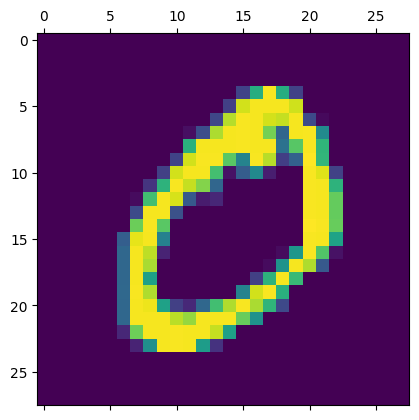

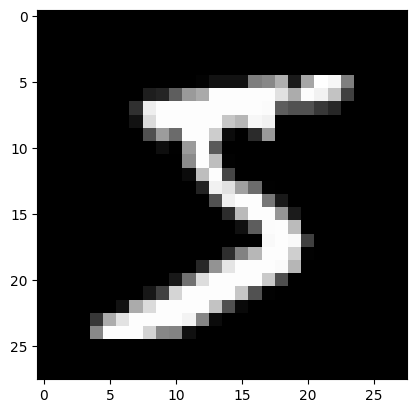

In [14]:
# Cell 3: Visualize Data
plt.matshow(x_train[1])
plt.show()

plt.imshow(x_train[0], cmap="gray")
plt.show()


In [15]:
# Cell 4: Normalize Data
x_train = x_train / 255
x_test = x_test / 255

In [16]:
# Cell 5: Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Cell 6: Compile and Train
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7216 - loss: 1.0693 - val_accuracy: 0.9016 - val_loss: 0.3607
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9030 - loss: 0.3531 - val_accuracy: 0.9162 - val_loss: 0.2976
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9167 - loss: 0.2994 - val_accuracy: 0.9259 - val_loss: 0.2617
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9240 - loss: 0.2680 - val_accuracy: 0.9324 - val_loss: 0.2380
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9311 - loss: 0.2437 - val_accuracy: 0.9358 - val_loss: 0.2216
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9373 - loss: 0.2192 - val_accuracy: 0.9415 - val_loss: 0.2054
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9443 - loss: 0.1989 - val_accuracy: 0.9445 - val_loss: 0.1913
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9465 - loss: 0.1891 - 

In [18]:
# Cell 7: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9457 - loss: 0.1882 
Loss=0.162
Accuracy=0.953


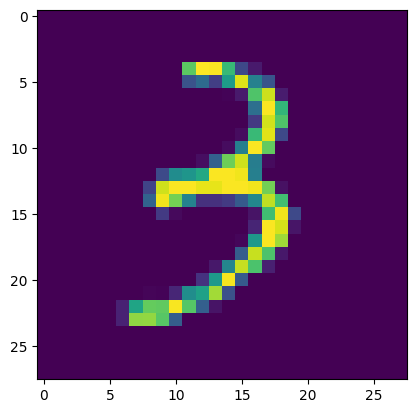

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step    
[9.8166999e-04 2.1407502e-03 9.3776634e-04 8.8265085e-01 6.1678011e-02
 2.5630206e-02 5.8907480e-04 3.9840415e-03 2.9343106e-03 1.8473260e-02]


In [19]:
# Cell 8: Predictions and Visualization
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()

predicted_value = model.predict(x_test)
print(predicted_value[n])

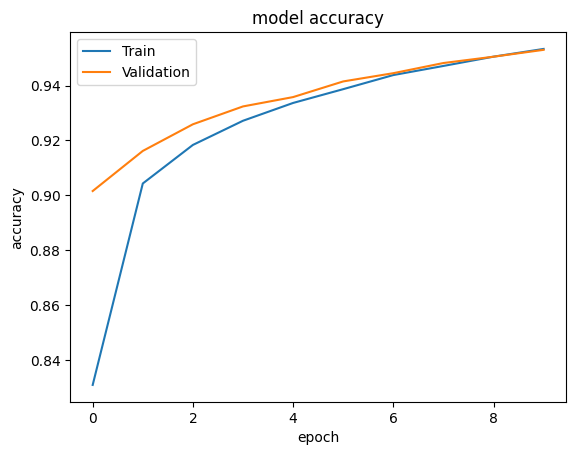

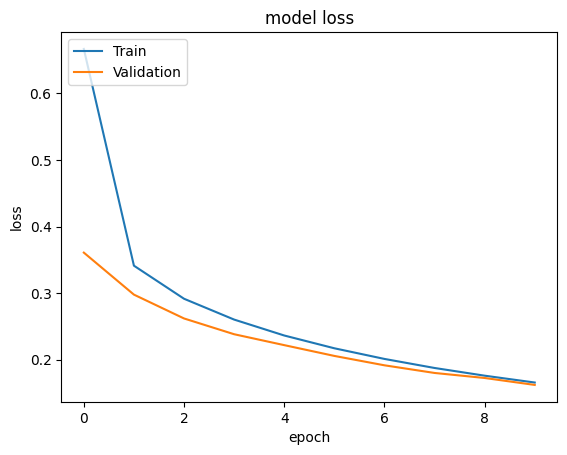

In [20]:
# Cell 9: Plot Accuracy and Loss Curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()